<a href="https://colab.research.google.com/github/Nkosiphendule999/Classification-Project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# Importing required modules
import pandas as pd
import numpy as np
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [151]:
# Load CSV (but not used here)
df = pd.read_csv('/content/drive/MyDrive/DataSet/Titanic-Dataset.csv')

In [152]:
# Check the structure
print("Columns:", df.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [153]:
# 2) Simple clean
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-852279069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-852279069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [154]:
# 3) Encode simple categoricals
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [155]:
# 4) Select features + target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
y = df['Survived']

In [156]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [157]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# 6) Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [159]:
# 7) Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168

Confusion matrix:
 [[98 12]
 [23 46]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



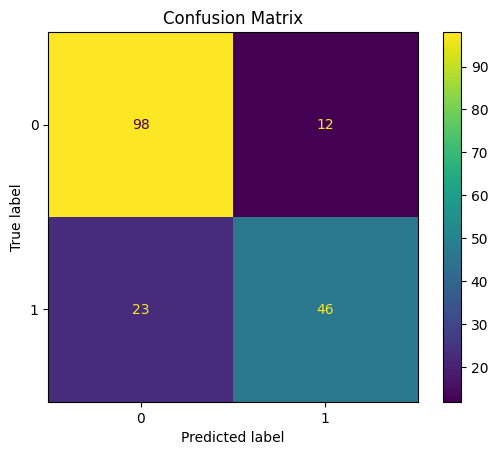

In [160]:
# 8) Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

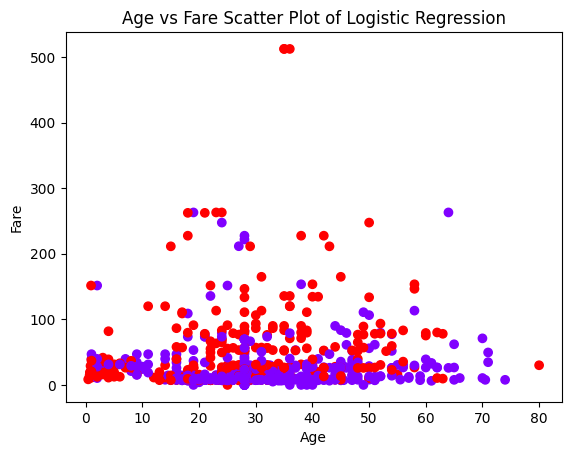

In [161]:
#Visualize data
plt.scatter(df['Age'], df['Fare'], c=y, cmap= 'rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare Scatter Plot of Logistic Regression')
plt.show()

 **Random forest Classification**

In [162]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [163]:
#Dropping some Data
df.drop(['Name','Parch','Ticket','Cabin'],axis='columns',inplace=True)



In [164]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.0,1,7.2500,2
1,2,1,1,0,38.0,1,71.2833,0
2,3,1,3,0,26.0,0,7.9250,2
3,4,1,1,0,35.0,1,53.1000,2
4,5,0,3,1,35.0,0,8.0500,2


In [165]:
#Transform String/Categorical data into Numeric Data
df.head()
df["Sex"].unique()
df["Sex"] = np.where(df["Sex"]=="male",0,1)

In [166]:
df["Embarked"].unique()
df["Embarked"] = df["Embarked"]==({"S": 0, "C": 1, "Q": 2})
df["Embarked"].unique()

array([False])

**Creating the training and Test dataset**

In [167]:
#Dependent variable
y = df["Survived"]

#Independent variables
x = df[["PassengerId","Pclass","Sex","Age","SibSp","Fare","Embarked"]]

# Creating a training and Test Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)



In [168]:
#Setting the Classification Random Forest Algorithm
Radom= RandomForestClassifier(criterion= 'gini', n_estimators=4,
                              max_depth =4, min_samples_split=4,
                              random_state=0)

In [169]:
#Apply the Random forest to Train Data
Radom.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=4,
                       random_state=0)

In [170]:
#Labels in the desision tree
labels = ["PassengerId","Pclass","Sex","Age","SibSp","Fare","Embarked"]

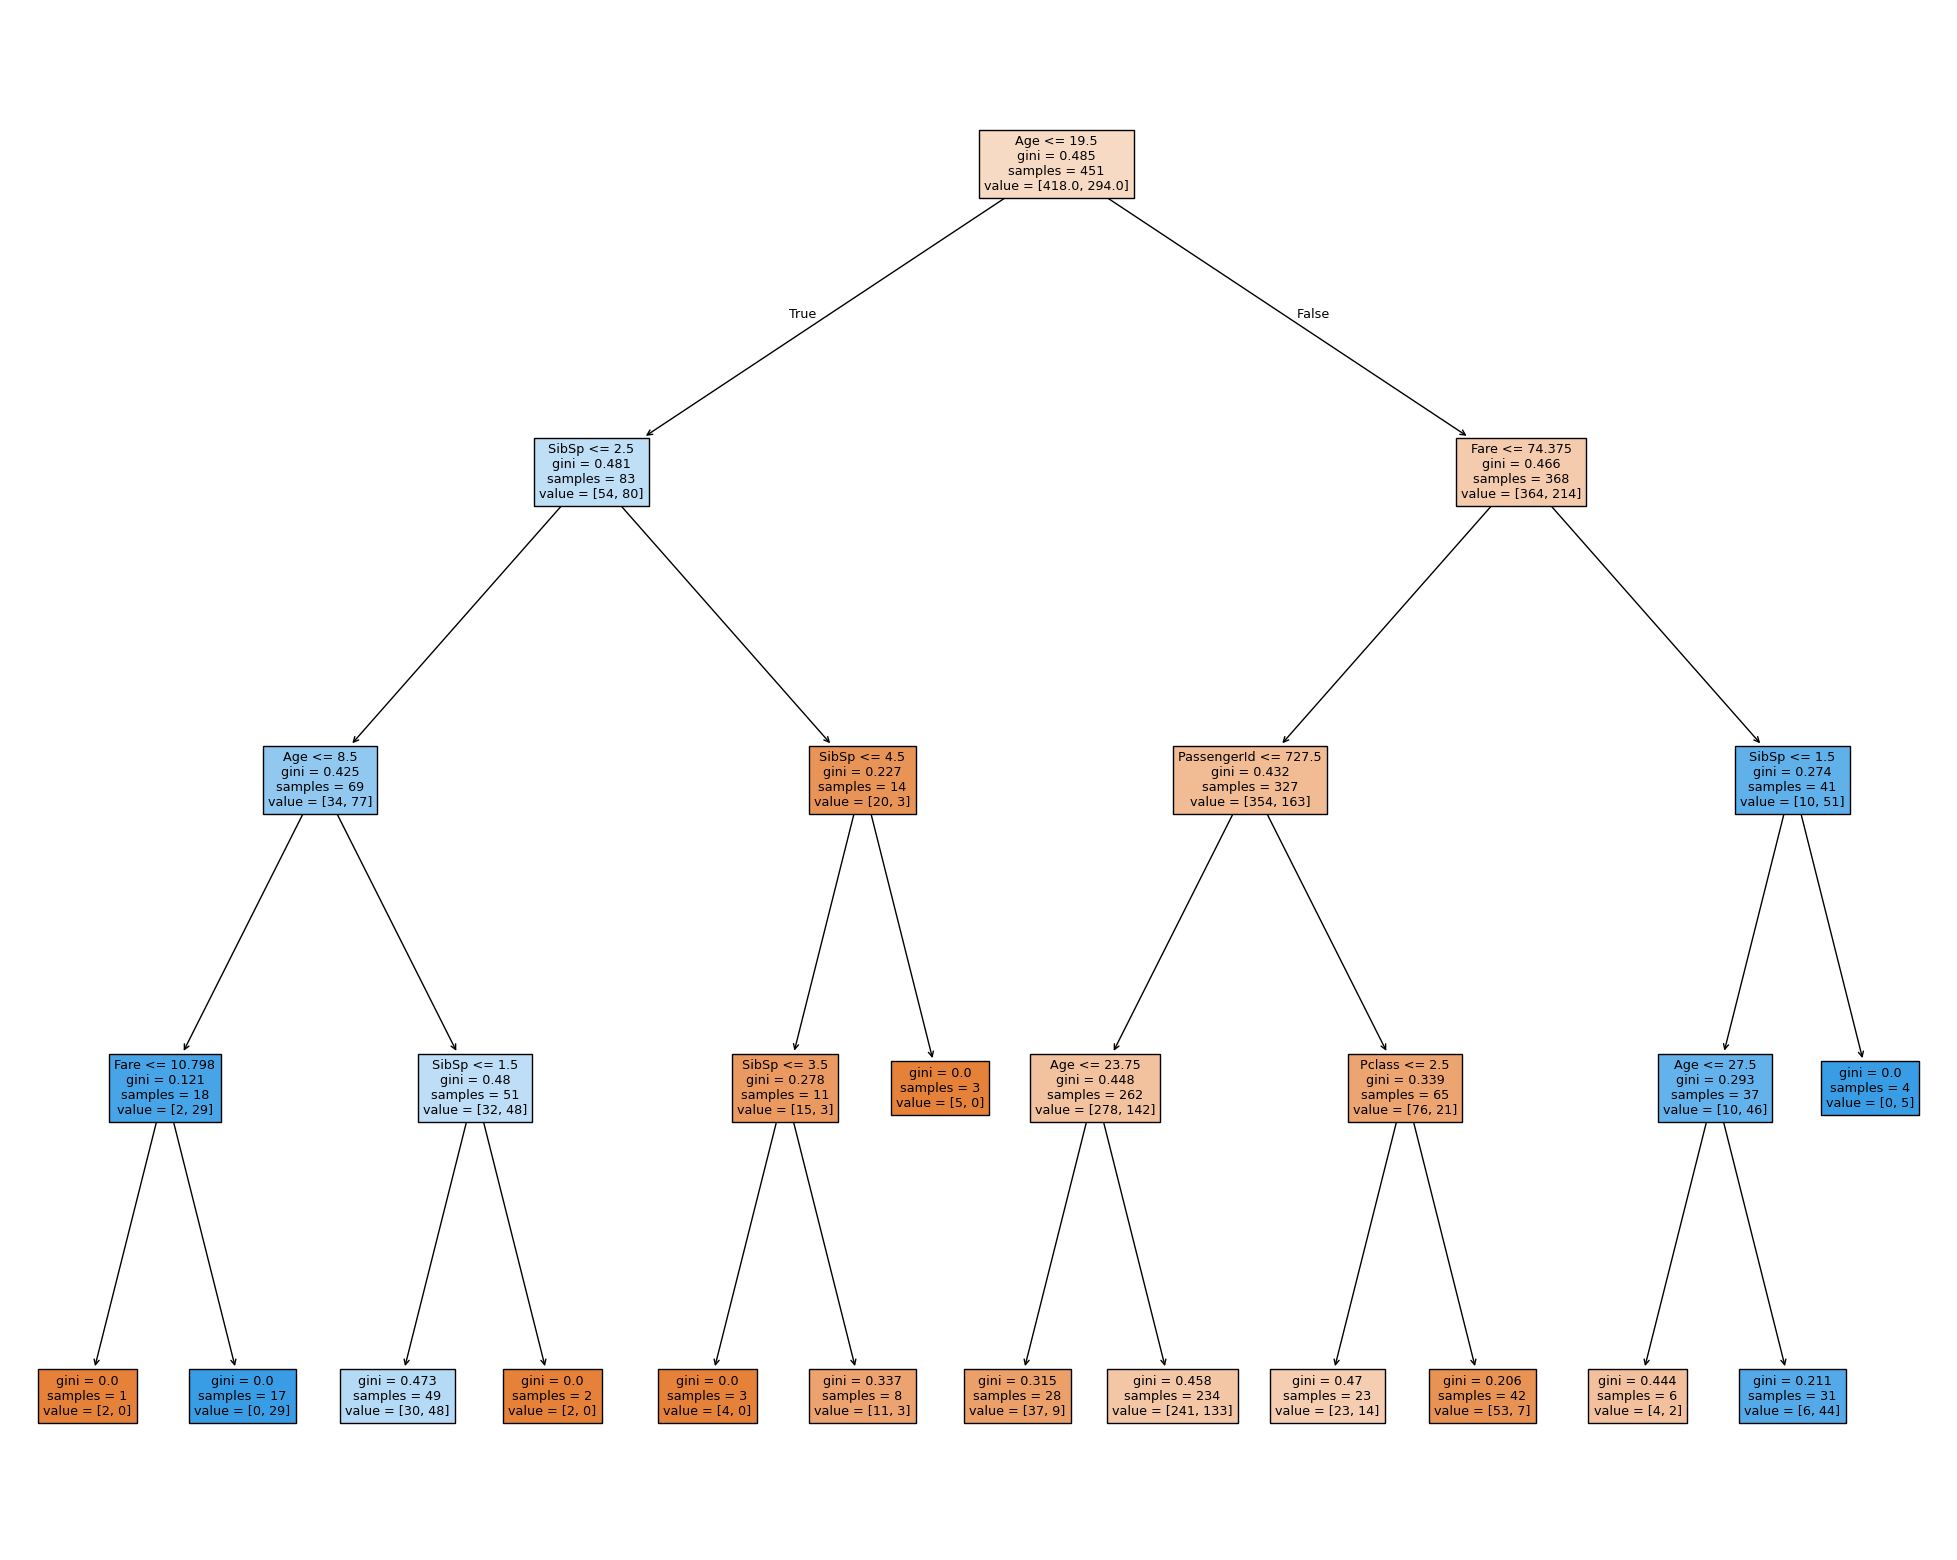

In [171]:
#View Decision Tree
# Tree 1
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Radom.estimators_[0],
                   feature_names=labels,
                   filled=True
                   ,impurity=True)
plt.show()

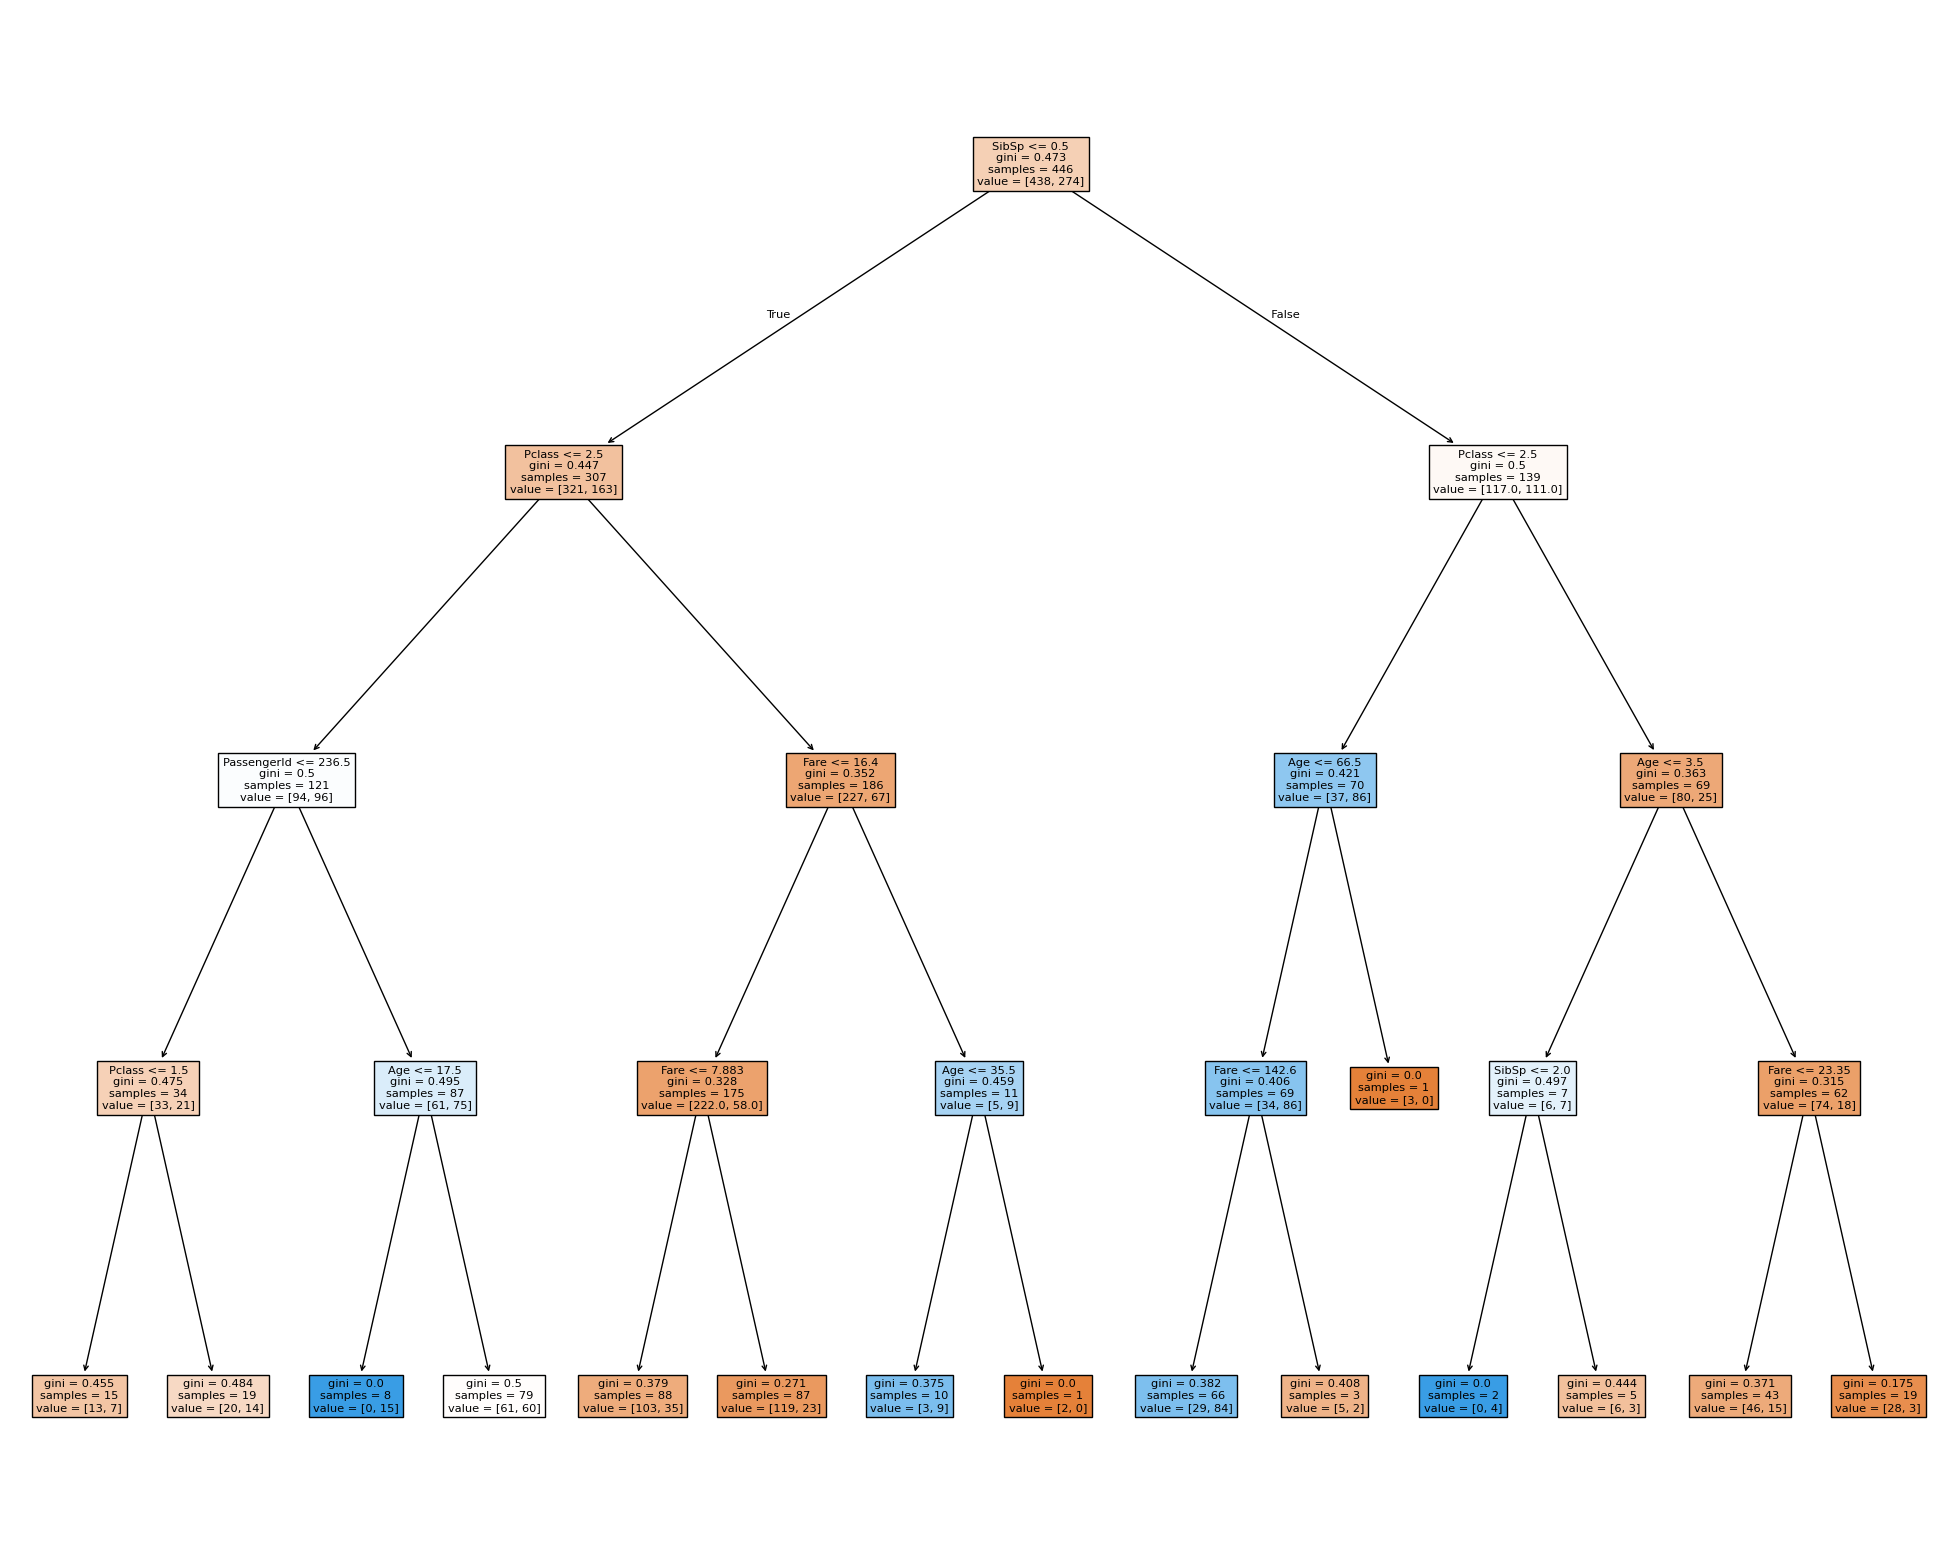

In [172]:
#Tree 2
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Radom.estimators_[1],
                   feature_names=labels,
                   filled=True
                   ,impurity=True)
plt.show()

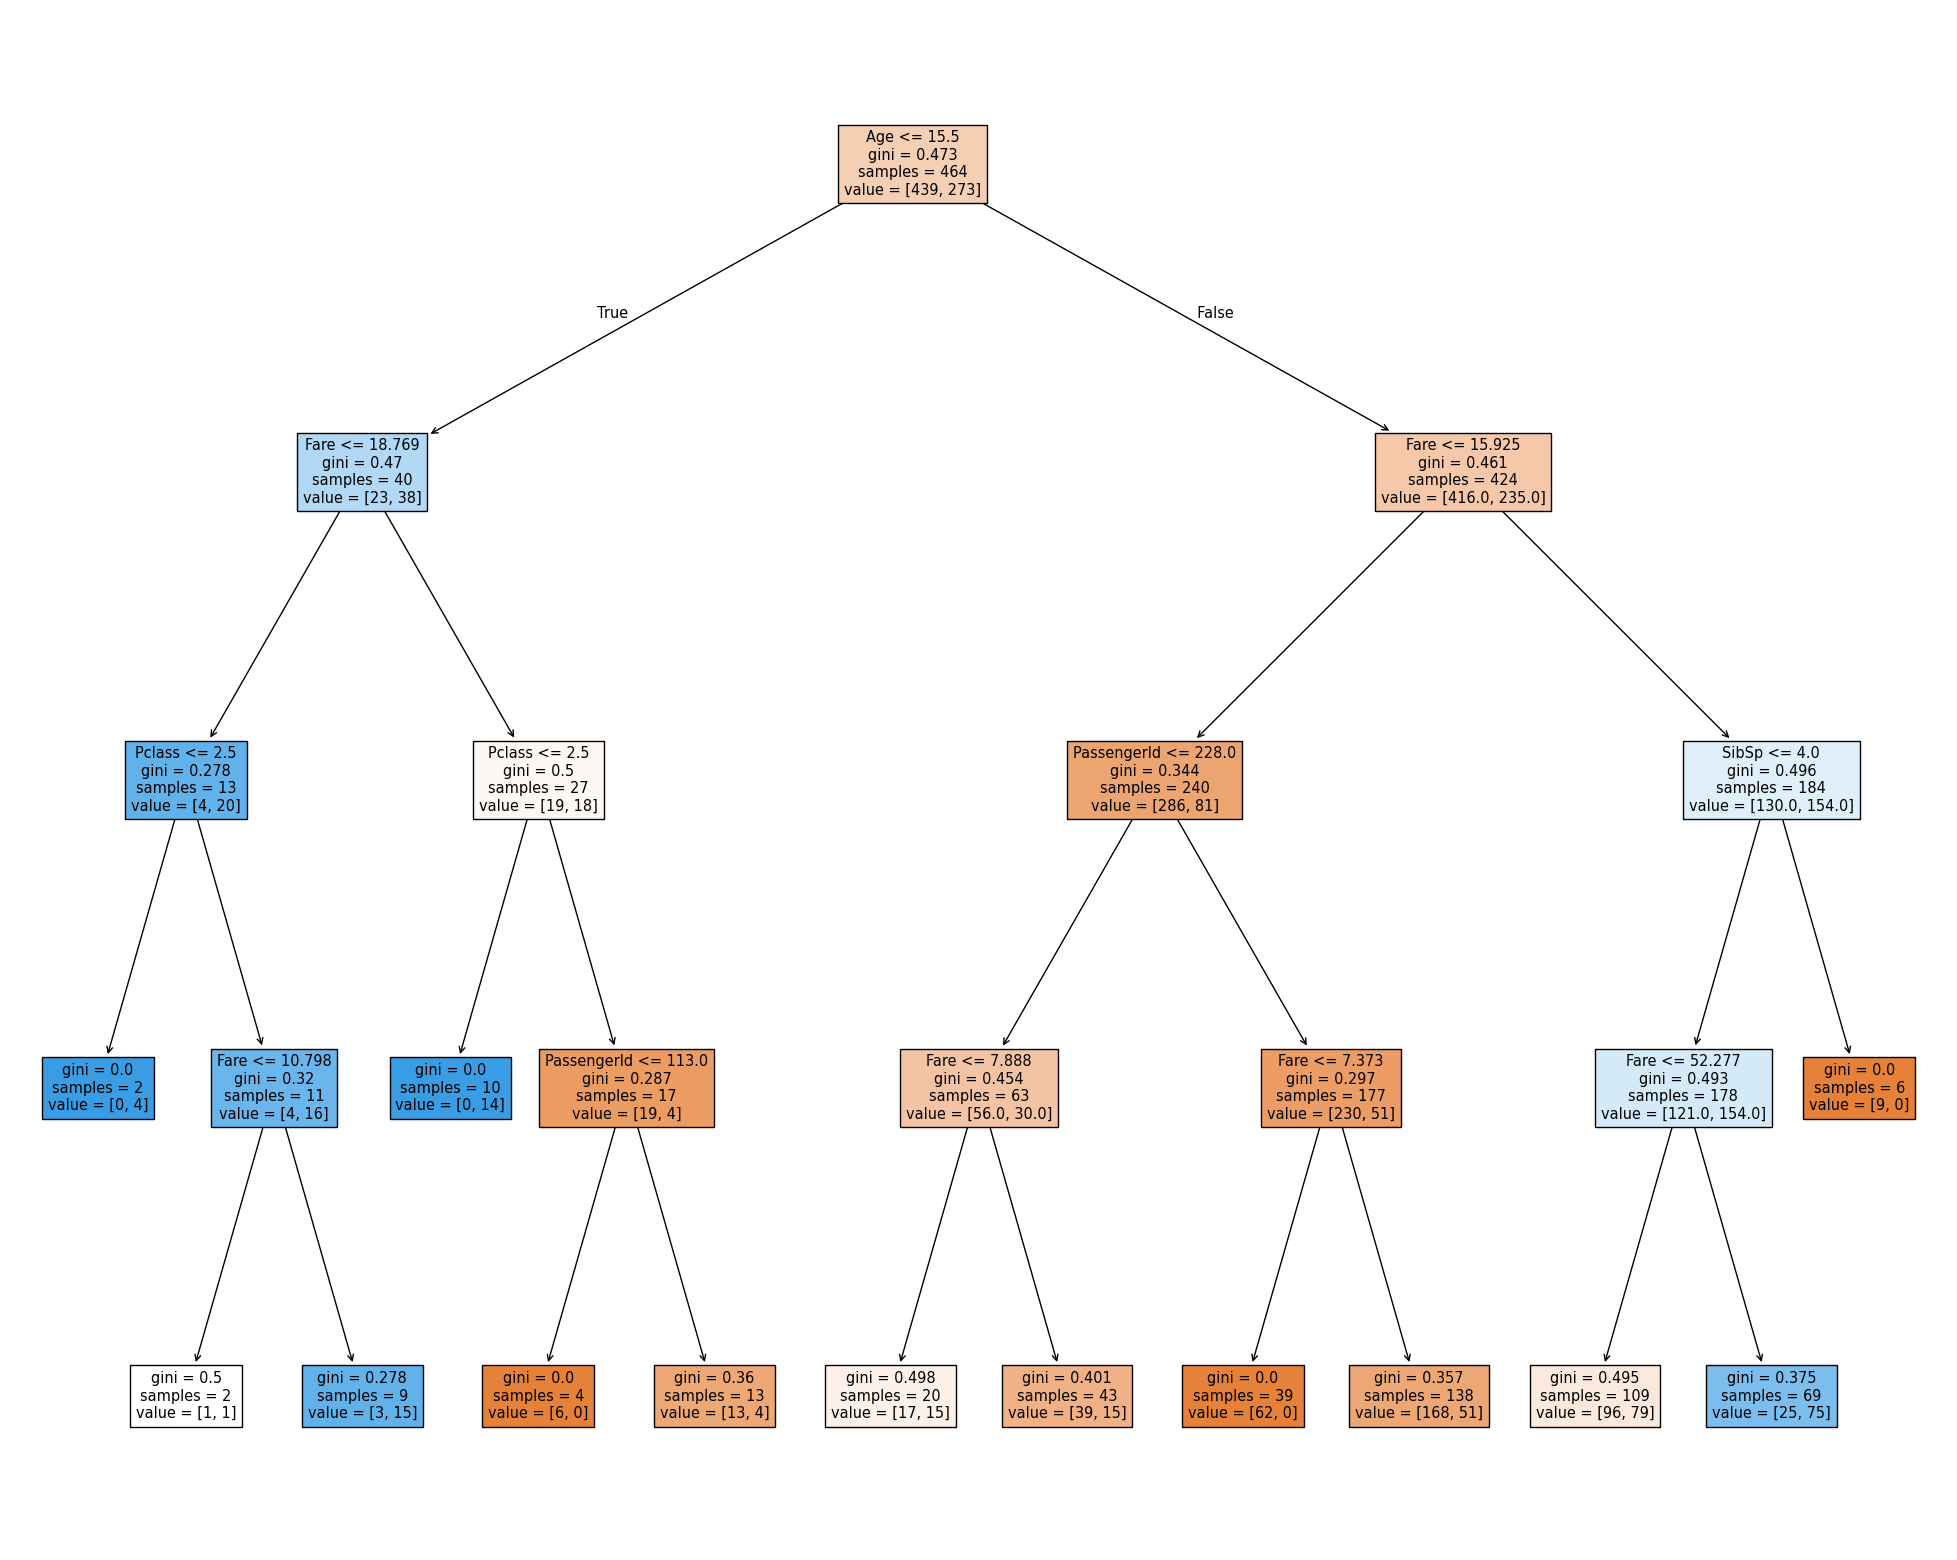

In [173]:
#Tree 3
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Radom.estimators_[2],
                   feature_names=labels,
                   filled=True
                   ,impurity=True)
plt.show()

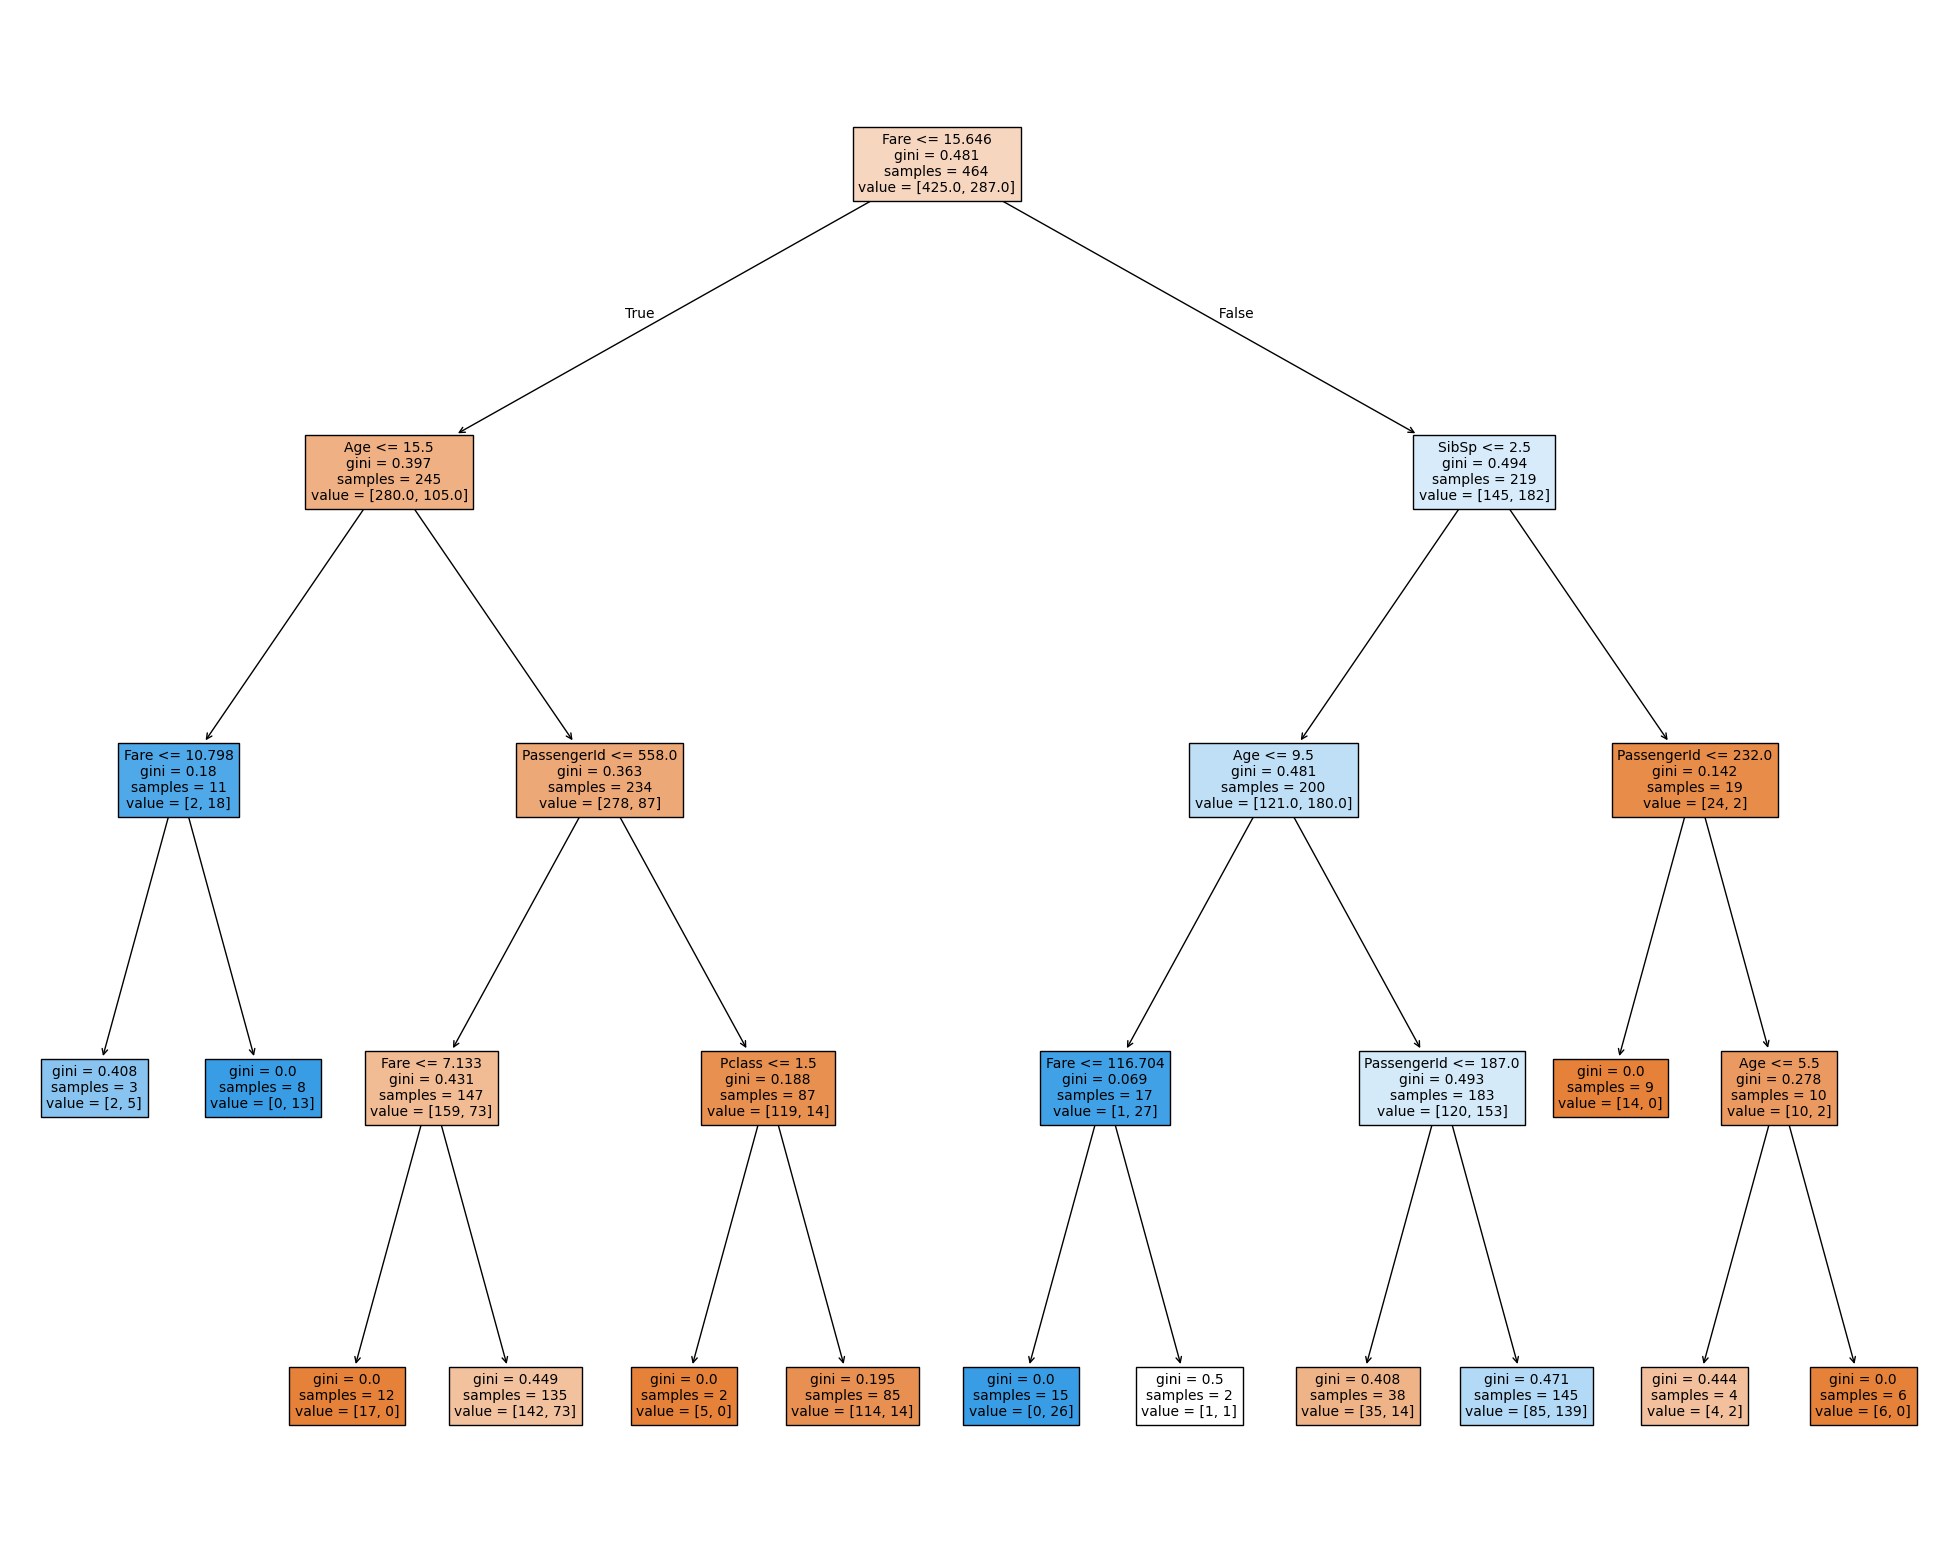

In [174]:
#Tree 4
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Radom.estimators_[3],
                   feature_names=labels,
                   filled=True
                   ,impurity=True)
plt.show()

In [175]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.0,1,7.2500,False
1,2,1,1,1,38.0,1,71.2833,False
2,3,1,3,1,26.0,0,7.9250,False
3,4,1,1,1,35.0,1,53.1000,False
4,5,0,3,1,35.0,0,8.0500,False


In [176]:
#Predict Individual Data point.
predictions = pd.DataFrame({"PassengerId":[3],
                            "Pclass":[1]
                             ,"Sex":[1]
                             ,"Age":[38.0]
                             ,"SibSp":[1]
                             ,"Fare":[71.2833],"Embarked":[False]})
print(Radom.predict(predictions))

[1]


In [177]:
#Apply Random Forest to test Data
y_test = pd.DataFrame(y_test)
y_test["Predicted"] = Radom.predict(x_test[["PassengerId","Pclass","Sex","Age","SibSp"
                                            ,"Fare","Embarked"]])
y_test.head()

,Survived,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,0


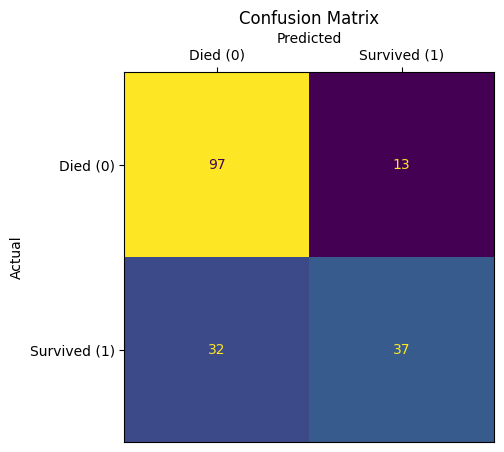

In [178]:
#Creating a Confusion Matrix
confMatrix =ConfusionMatrixDisplay.from_predictions(y_test["Survived"],y_test["Predicted"],
                                                    labels = [0,1],colorbar=False, display_labels=["Died (0)"
                                                    ,"Survived (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
ax = confMatrix.ax_
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Confusion Matrix")
plt.show()

In [179]:
# Calculating Accuracy
metrics.accuracy_score(y_test["Survived"],y_test["Predicted"])

0.7486033519553073

In [180]:
#Calculating Misclassifaction Rate
1 - metrics.accuracy_score(y_test["Survived"],y_test["Predicted"])

0.25139664804469275

In [181]:
#How accurate was the prediction of true values
recall_score(y_test["Survived"],y_test["Predicted"], pos_label=1)

0.5362318840579711

In [182]:
#How accurate was the prediction of false values
recall_score(y_test["Survived"],y_test["Predicted"], pos_label=0)

0.8818181818181818